<a href="https://colab.research.google.com/github/Deflyer/Emotions-heatmap/blob/main/Baseline_emotions_with_heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup

##Bibliotecas necessárias

In [ ]:
import pandas as pd
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13707 sha256=6e0eb79634fd6297f8867335e107d8a11e92d5e8ea6d68ba83c7538f58d698e4
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


##Baixando dados e traduzindo para o ingles(língua usada no modelo de classificação de emoções)

In [ ]:
!pip install webvtt-py
import webvtt
import gdown

###Gerar/escolher novo vtt para novo video

In [ ]:
"""
Pasta contendo todos os arquivos, necessario escolher um vtt para funcionar direto ou aplicar whisper em um dos mp4
url = "https://drive.google.com/drive/folders/1KgghatqDW0MmoJht-e7BOM1kR4RRfRwu?usp=drive_link"
"""

###Utilizar vtt ja gerado anteriormente

In [ ]:
"""
Um dos arquivos vtt direto, ja aplicado o whisper nele
"""
url = "https://drive.google.com/file/d/18XEX7jOopcwZpydcdFcedXEwrVO6XAJG/view?usp=drive_link"
output = "emotions.vtt"
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=18XEX7jOopcwZpydcdFcedXEwrVO6XAJG
To: /content/emotions.vtt
100%|██████████| 92.9k/92.9k [00:00<00:00, 39.1MB/s]


'emotions.vtt'

In [ ]:
import webvtt

L = []
for caption in webvtt.read('emotions.vtt'):
  L.append([caption.start,caption.end,str(caption.text)])

df_transcript = pd.DataFrame(L)
df_transcript

,0,1,2
0,00:00:00.000,00:00:02.000,Bom dia.
1,00:00:02.000,00:00:04.000,Bom dia.
2,00:00:04.000,00:00:23.000,Nós gostaríamos de começar perguntando o seu n...
3,00:00:23.000,00:00:24.000,nascimento.
4,00:00:24.000,00:00:27.000,Eu me chamo Lourdes Alves de Souza.
...,...,...,...
748,01:45:42.000,01:46:01.000,"E eu, de algum modo, gostaria que a minha hist..."
749,01:46:01.000,01:46:21.000,"Acho que é isso que me motiva, contar a minha ..."
750,01:46:21.000,01:46:39.000,Isso me motiva. Também ainda com uma visão de ...
751,01:46:39.000,01:46:46.000,"Então, a gente gostaria de agradecer. Luanice,..."


###Tradução para o inglês

In [ ]:
!pip install transformers
!git clone https://github.com/unicamp-dl/Lite-T5-Translation.git
!pip install -r Lite-T5-Translation/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 96.0 MB/s eta 0:00:00
fatal: destination path 'Lite-T5-Translation' already exists and is not an empty directory.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached absl-py-0.9.0.tar.gz (104 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the pack

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline
  
tokenizer = AutoTokenizer.from_pretrained("unicamp-dl/translation-pt-en-t5")

model = AutoModelForSeq2SeqLM.from_pretrained("unicamp-dl/translation-pt-en-t5")

pten_pipeline = pipeline('text2text-generation', model=model, tokenizer=tokenizer)

pten_pipeline("translate Portuguese to English: Eu gosto de comer arroz.")

[{'generated_text': 'I like to eat rice.'}]

In [ ]:
def Traduz(frase):
  traducao = pten_pipeline(frase)
  traducao = list(traducao[0].values())
  return traducao[0]

In [ ]:
df_transcript['Translation'] = list(df_transcript[2].apply(Traduz))
df_transcript

,0,1,2,Translation
0,00:00:00.000,00:00:02.000,Bom dia.,Good morning.
1,00:00:02.000,00:00:04.000,Bom dia.,Good morning.
2,00:00:04.000,00:00:23.000,Nós gostaríamos de começar perguntando o seu n...,"We would like to start by asking your full name,"
3,00:00:23.000,00:00:24.000,nascimento.,Birth.
4,00:00:24.000,00:00:27.000,Eu me chamo Lourdes Alves de Souza.,I call myself Lourdes Alves de Souza.
...,...,...,...,...
748,01:45:42.000,01:46:01.000,"E eu, de algum modo, gostaria que a minha hist...","I, in some way, would like my story to"
749,01:46:01.000,01:46:21.000,"Acho que é isso que me motiva, contar a minha ...","I think that's what motivates me, tell my own"
750,01:46:21.000,01:46:39.000,Isso me motiva. Também ainda com uma visão de ...,I also have a view that it is not personal vag...
751,01:46:39.000,01:46:46.000,"Então, a gente gostaria de agradecer. Luanice,...","Luanice, very thank you for coming here today."


In [ ]:
df_transcript['Translation'] = df_transcript[2].apply(Traduz)
df_transcript

,0,1,2,Translation
0,00:00:00.000,00:00:02.000,Bom dia.,[Good morning.]
1,00:00:02.000,00:00:04.000,Bom dia.,[Good morning.]
2,00:00:04.000,00:00:23.000,Nós gostaríamos de começar perguntando o seu n...,[We would like to start by asking your full na...
3,00:00:23.000,00:00:24.000,nascimento.,[Birth.]
4,00:00:24.000,00:00:27.000,Eu me chamo Lourdes Alves de Souza.,[I call myself Lourdes Alves de Souza.]
...,...,...,...,...
748,01:45:42.000,01:46:01.000,"E eu, de algum modo, gostaria que a minha hist...","[I, in some way, would like my story to]"
749,01:46:01.000,01:46:21.000,"Acho que é isso que me motiva, contar a minha ...","[I think that's what motivates me, tell my own]"
750,01:46:21.000,01:46:39.000,Isso me motiva. Também ainda com uma visão de ...,[I also have a view that it is not personal va...
751,01:46:39.000,01:46:46.000,"Então, a gente gostaria de agradecer. Luanice,...","[Luanice, very thank you for coming here today.]"


##Extraindo labels de emocoes das frases em inglês

In [ ]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 20.7 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=dff23a47bb7677b7491ef9e118ac5bed1b3cc8980879ecf361b5a84e9c240f4b
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
from transformers import RobertaTokenizerFast, TFRobertaForSequenceClassification, pipeline

tokenizer = RobertaTokenizerFast.from_pretrained("bhadresh-savani/bert-base-go-emotion")
model = TFRobertaForSequenceClassification.from_pretrained("bhadresh-savani/bert-base-go-emotion",from_pt=True)

emotion = pipeline('sentiment-analysis', 
                    model="bhadresh-savani/bert-base-go-emotion",
                    return_all_scores=True)

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DistilBertTokenizer'. 
The class this function is called from is 'RobertaTokenizerFast'.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


You are using a model of type bert to instantiate a model of type roberta. This is not supported for all configurations of models and can yield errors.


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['bert.encoder.layer.3.attention.self.key.weight', 'bert.encoder.layer.8.attention.self.value.weight', 'bert.encoder.layer.5.attention.output.LayerNorm.weight', 'bert.encoder.layer.2.attention.output.LayerNorm.bias', 'bert.encoder.layer.3.attention.output.dense.bias', 'bert.encoder.layer.0.attention.self.key.weight', 'bert.encoder.layer.5.attention.self.value.weight', 'bert.encoder.layer.10.output.LayerNorm.bias', 'bert.embeddings.position_embeddings.weight', 'bert.encoder.layer.3.output.dense.bias', 'bert.encoder.layer.10.attention.self.query.bias', 'bert.encoder.layer.8.attention.output.dense.weight', 'bert.encoder.layer.11.attention.output.LayerNorm.weight', 'bert.encoder.layer.8.output.LayerNorm.weight', 'bert.embeddings.LayerNorm.weight', 'bert.encoder.layer.2.attention.self.value.weight', 'bert.encoder.layer.5.attention.output.dense.weight', 'bert.encoder.layer.1

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [ ]:
def Emocao_provavel(frase):
  emotion_labels = emotion(frase)

  max = emotion_labels[0][0]["score"]
  emocao = emotion_labels[0][0]["label"]

  for dict in emotion_labels[0]:
    if dict["score"] > max:
      max = dict["score"]
      emocao = dict["label"]

  return emocao, max

In [ ]:
resp = list(df_transcript['Translation'].apply(Emocao_provavel))
temp = pd.DataFrame.from_records(resp, columns=['label', 'prob'])

df_transcript = pd.concat([df_transcript, temp], axis=1)
df_transcript

,0,1,2,Translation,label,prob
0,00:00:00.000,00:00:02.000,Bom dia.,Good morning.,admiration,0.766542
1,00:00:02.000,00:00:04.000,Bom dia.,Good morning.,admiration,0.766542
2,00:00:04.000,00:00:23.000,Nós gostaríamos de começar perguntando o seu n...,"We would like to start by asking your full name,",neutral,0.793600
3,00:00:23.000,00:00:24.000,nascimento.,Birth.,neutral,0.924464
4,00:00:24.000,00:00:27.000,Eu me chamo Lourdes Alves de Souza.,I call myself Lourdes Alves de Souza.,neutral,0.277567
...,...,...,...,...,...,...
748,01:45:42.000,01:46:01.000,"E eu, de algum modo, gostaria que a minha hist...","I, in some way, would like my story to",neutral,0.348922
749,01:46:01.000,01:46:21.000,"Acho que é isso que me motiva, contar a minha ...","I think that's what motivates me, tell my own",neutral,0.509090
750,01:46:21.000,01:46:39.000,Isso me motiva. Também ainda com uma visão de ...,I also have a view that it is not personal vag...,neutral,0.274121
751,01:46:39.000,01:46:46.000,"Então, a gente gostaria de agradecer. Luanice,...","Luanice, very thank you for coming here today.",gratitude,0.950028


##Salvando o resultado

In [ ]:
#Tirar frases em ingles
df_transcript.drop("Translation", axis = 1, inplace = True)
df_transcript

,0,1,2,label,prob
0,00:00:00.000,00:00:02.000,Bom dia.,admiration,0.766542
1,00:00:02.000,00:00:04.000,Bom dia.,admiration,0.766542
2,00:00:04.000,00:00:23.000,Nós gostaríamos de começar perguntando o seu n...,neutral,0.793600
3,00:00:23.000,00:00:24.000,nascimento.,neutral,0.924464
4,00:00:24.000,00:00:27.000,Eu me chamo Lourdes Alves de Souza.,neutral,0.277567
...,...,...,...,...,...
748,01:45:42.000,01:46:01.000,"E eu, de algum modo, gostaria que a minha hist...",neutral,0.348922
749,01:46:01.000,01:46:21.000,"Acho que é isso que me motiva, contar a minha ...",neutral,0.509090
750,01:46:21.000,01:46:39.000,Isso me motiva. Também ainda com uma visão de ...,neutral,0.274121
751,01:46:39.000,01:46:46.000,"Então, a gente gostaria de agradecer. Luanice,...",gratitude,0.950028


In [ ]:
df_transcript.to_pickle('df_transcript_baseline.pkl')

#Mapa de calor

##Baixar dados ja gerados anteriormente

In [ ]:
import gdown
import pandas as pd

url = "https://drive.google.com/file/d/17HJl5tPQepVgzOa5hNyR3AuINOcLM5W4/view?usp=drive_link"
output = "df_transcript_baseline.pkl"
gdown.download(url, output, quiet=False, fuzzy=True)

In [ ]:
df_transcript = pd.read_pickle('df_transcript_baseline.pkl')
df_transcript

##Baixar coordenadas das emoções e adicionando-as ao dataframe

In [ ]:
import gdown
import pandas as pd

#Recebendo planilha com as coordenadas das emoções.
url1 = 'https://drive.google.com/uc?id=1yJBHU8Zl4MuoQfJqkPgVDwJfYRJDPUAH'
output = 'emotions_coord.xlsx'
gdown.download(url1, output, quiet=False)
emotions_coord = pd.read_excel(output)

Downloading...
From: https://drive.google.com/uc?id=1yJBHU8Zl4MuoQfJqkPgVDwJfYRJDPUAH
To: /content/emotions_coord.xlsx
100%|██████████| 8.77k/8.77k [00:00<00:00, 19.9MB/s]


In [ ]:
emotions_coord

,Emotion,X,Y
0,admiration,0.38,-0.08
1,amusement,0.56,0.19
2,anger,-0.41,0.78
3,annoyance,-0.45,0.66
4,approval,0.95,-0.17
5,caring,0.76,-0.60
6,confusion,-0.57,-0.69
7,curiosity,0.65,0.10
8,desire,0.42,0.65
9,disappointment,-0.80,-0.02


In [ ]:
#Função que dada uma emoção determina sua coordenada no mapa.

def generate_coord(label):
  index = emotions_coord.loc[emotions_coord['Emotion'] == label].index[0]
  x = emotions_coord.iloc[index]['X']
  y = emotions_coord.iloc[index]['Y']
  return (x,y)

In [ ]:
resp = list(df_transcript['label'].apply(generate_coord))
temp = pd.DataFrame.from_records(resp, columns=['x', 'y'])

df_transcript = pd.concat([df_transcript, temp], axis=1)
df_transcript

,0,1,2,label,prob,x,y
0,00:00:00.000,00:00:02.000,Bom dia.,admiration,0.766542,0.38,-0.08
1,00:00:02.000,00:00:04.000,Bom dia.,admiration,0.766542,0.38,-0.08
2,00:00:04.000,00:00:23.000,Nós gostaríamos de começar perguntando o seu n...,neutral,0.793600,0.00,0.00
3,00:00:23.000,00:00:24.000,nascimento.,neutral,0.924464,0.00,0.00
4,00:00:24.000,00:00:27.000,Eu me chamo Lourdes Alves de Souza.,neutral,0.277567,0.00,0.00
...,...,...,...,...,...,...,...
748,01:45:42.000,01:46:01.000,"E eu, de algum modo, gostaria que a minha hist...",neutral,0.348922,0.00,0.00
749,01:46:01.000,01:46:21.000,"Acho que é isso que me motiva, contar a minha ...",neutral,0.509090,0.00,0.00
750,01:46:21.000,01:46:39.000,Isso me motiva. Também ainda com uma visão de ...,neutral,0.274121,0.00,0.00
751,01:46:39.000,01:46:46.000,"Então, a gente gostaria de agradecer. Luanice,...",gratitude,0.950028,0.90,-0.30


##Geracao do heatmap

In [ ]:
#HEATMAP
import matplotlib.pyplot as plt
import numpy as np
import math

array_x = df_transcript['x'].to_numpy()
x = array_x.tolist()
array_y = df_transcript['y'].to_numpy()
y = array_y.tolist()

#Definindo tamanho do grid e do raio(h)
grid_size=0.07
h=1

#Tomando valores de máximos e mínimos de X e Y.
x_min=min(x)
x_max=max(x)
y_min=min(y)
y_max=max(y)

#Construindo grid
x_grid=np.arange(x_min-h,x_max+h,grid_size)
y_grid=np.arange(y_min-h,y_max+h,grid_size)
x_mesh,y_mesh=np.meshgrid(x_grid,y_grid)

#Determinando ponto central do grid
xc=x_mesh+(grid_size/2)
yc=y_mesh+(grid_size/2)

In [ ]:
#Função para calcular intensidade com Quartic Kernel
def kde_quartic(d,h):
    dn=d/h
    P=(15/16)*(1-dn**2)**2
    return P

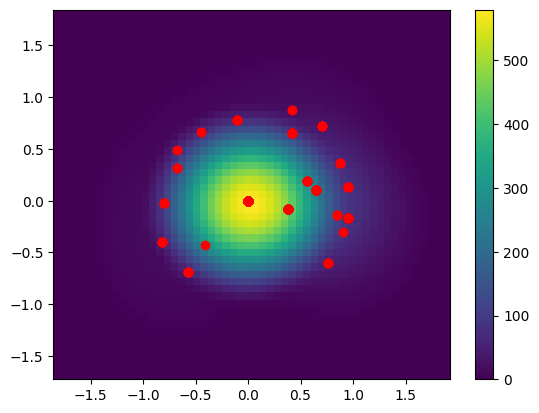

In [ ]:
intensity_list=[]
for j in range(len(xc)):
    intensity_row=[]
    for k in range(len(xc[0])):
        kde_value_list=[]
        for i in range(len(x)):
            #Calculando distância
            d=math.sqrt((xc[j][k]-x[i])**2+(yc[j][k]-y[i])**2) 
            if d<=h:
                p=kde_quartic(d,h)
            else:
                p=0
            kde_value_list.append(p)
        #Soma os valores de intensidade
        p_total=sum(kde_value_list)
        intensity_row.append(p_total)
    intensity_list.append(intensity_row)

#Saída do Heatmap   
intensity=np.array(intensity_list)
plt.pcolormesh(x_mesh,y_mesh,intensity)
plt.plot(x,y,'ro')
plt.colorbar()
plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


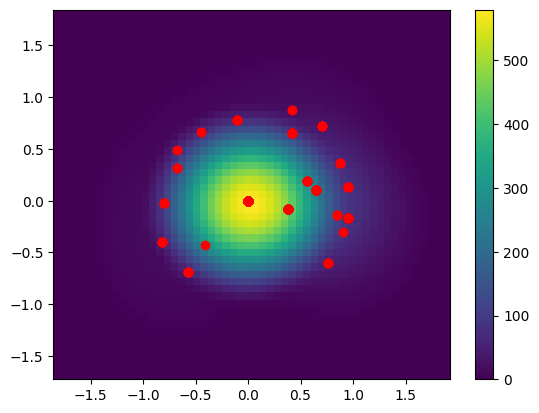

In [ ]:
!pip install pillow
from PIL import Image


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


intensity_list=[]
for j in range(len(xc)):
    intensity_row=[]
    for k in range(len(xc[0])):
        kde_value_list=[]
        for i in range(len(x)):
            #Calculando distância
            d=math.sqrt((xc[j][k]-x[i])**2+(yc[j][k]-y[i])**2) 
            if d<=h:
                p=kde_quartic(d,h)
            else:
                p=0
            kde_value_list.append(p)
        #Soma os valores de intensidade
        p_total=sum(kde_value_list)
        intensity_row.append(p_total)
    intensity_list.append(intensity_row)

#Saída do Heatmap   
intensity=np.array(intensity_list)
plt.pcolormesh(x_mesh,y_mesh,intensity)
plt.plot(x,y,'ro')
plt.colorbar()
plt.show()


##Plotando em cima de uma arousal_valence

In [ ]:

url = "https://drive.google.com/file/d/1XVYmoG9_hw28LqmFaIgFRw9bM9kxiu0T/view?usp=drive_link"
output = "emotion_wheel.png"
gdown.download(url, output, quiet=False, fuzzy=True)

In [ ]:
# Import image and get x and y extents
I = Image.open('./emotion_wheel.png')

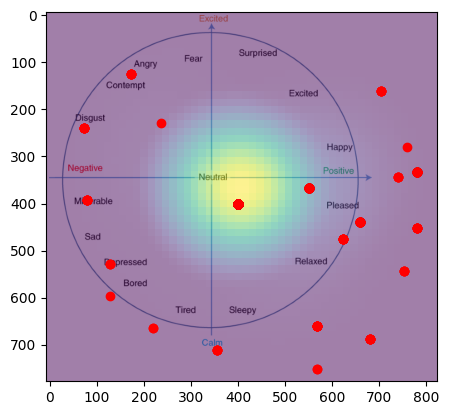

In [ ]:
#Plot image and overlay colormap
fig, ax = plt.subplots(1, 1)
ax.imshow(I)

intensity_list=[]
for j in range(len(xc)):
    intensity_row=[]
    for k in range(len(xc[0])):
        kde_value_list=[]
        for i in range(len(x)):
            #Calculando distância
            d=math.sqrt((xc[j][k]-x[i])**2+(yc[j][k]-y[i])**2) 
            if d<=h:
                p=kde_quartic(d,h)
            else:
                p=0
            kde_value_list.append(p)
        #Soma os valores de intensidade
        p_total=sum(kde_value_list)
        intensity_row.append(p_total)
    intensity_list.append(intensity_row)

#Saída do Heatmap   
intensity=np.array(intensity_list)
#intensity = np.ma.masked_array(intensity, intensity < -.10)


# APROXIMACAO GROSSEIRA 
x_mesh2 = (x_mesh+ np.abs(np.min(x_mesh)))*220
y_mesh2 = (y_mesh+ np.abs(np.min(y_mesh)))*220
plt.pcolormesh(x_mesh2,y_mesh2,intensity,alpha=0.5)
plt.plot(np.array(x)*400+400,np.array(y)*400+400,'ro')




plt.show()